In [ ]:
# setting up the connection between kaggle and colab

In [ ]:
pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
cp kaggle.json ~/.kaggle

In [6]:
! kaggle datasets download -d prasunroy/natural-images

 94% 321M/342M [00:02<00:00, 145MB/s]
100% 342M/342M [00:02<00:00, 169MB/s]


In [8]:
! unzip natural-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0204.jpg  
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflati

In [ ]:
# import libs

In [9]:
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.python.keras import regularizers
from keras import optimizers, metrics, models
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout

In [ ]:
# setting up the data and spliting it for test and training

In [10]:
data_dir ='./natural_images'
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = keras.preprocessing.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.2,
                                                              subset="training",
                                                              seed=123,
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size
                                                            )

Found 6899 files belonging to 8 classes.
Using 5520 files for training.


In [12]:
val_ds = keras.preprocessing.image_dataset_from_directory(
                                                            data_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=123,
                                                            image_size=(img_height, img_width),
                                                            batch_size=batch_size
                                                          )

Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


In [13]:
# validating our data is corrextly retrived 
class_names = train_ds.class_names
print(class_names)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [14]:
# first lets train our model using adam for optimization, 10 epochs and relu for activation 
model = Sequential([
  layers.Dense(10, activation='relu'),
  layers.Flatten(),
  layers.Dense(len(class_names))
])

model.compile( optimizer='adam',
               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
173/173 [==============================] - 12s 53ms/step - loss: 1198.9613 - accuracy: 0.5580 - val_loss: 292.3171 - val_accuracy: 0.6701
Epoch 2/10
173/173 [==============================] - 8s 48ms/step - loss: 261.0435 - accuracy: 0.7063 - val_loss: 201.0293 - val_accuracy: 0.7259
Epoch 3/10
173/173 [==============================] - 8s 45ms/step - loss: 204.8888 - accuracy: 0.7527 - val_loss: 170.6743 - val_accuracy: 0.7462
Epoch 4/10
173/173 [==============================] - 9s 48ms/step - loss: 130.5808 - accuracy: 0.7909 - val_loss: 160.6104 - val_accuracy: 0.7331
Epoch 5/10
173/173 [==============================] - 8s 44ms/step - loss: 69.8924 - accuracy: 0.8386 - val_loss: 142.7447 - val_accuracy: 0.7346
Epoch 6/10
173/173 [==============================] - 9s 50ms/step - loss: 55.8610 - accuracy: 0.8406 - val_loss: 150.7051 - val_accuracy: 0.7208
Epoch 7/10
173/173 [==============================] - 8s 43ms/step - loss: 41.8199 - accuracy: 0.8616 - val_loss: 83.9

In [15]:
# lets see our model acurracy based on what we created above
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

test_acc

44/44 - 2s - loss: 127.1734 - accuracy: 0.7469 - 2s/epoch - 52ms/step


0.7469180822372437

Based on this we can see that there is **Overfitting**. We see that there is low accuracy on the testing dataset compare to the training dataset.

---



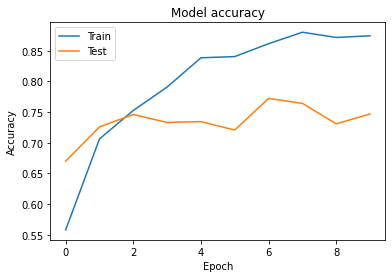

In [16]:
#lets see the graphical representation of the overfitting problem 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

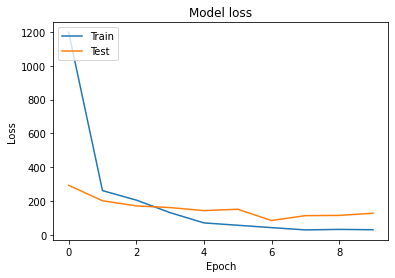

In [17]:
# graphic representation for plot loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

To prevent the overfitting, lets add weight regularization and dropout to our model

In [18]:
# improved model to prevent overfitting
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(len(class_names),kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
173/173 [==============================] - 15s 81ms/step - loss: 7.6020 - accuracy: 0.3491 - val_loss: 1.9836 - val_accuracy: 0.6577
Epoch 2/10
173/173 [==============================] - 11s 64ms/step - loss: 2.4183 - accuracy: 0.4516 - val_loss: 1.1792 - val_accuracy: 0.7752
Epoch 3/10
173/173 [==============================] - 10s 57ms/step - loss: 1.6345 - accuracy: 0.5074 - val_loss: 0.8694 - val_accuracy: 0.7941
Epoch 4/10
173/173 [==============================] - 8s 45ms/step - loss: 1.4387 - accuracy: 0.5183 - val_loss: 0.8183 - val_accuracy: 0.8006
Epoch 5/10
173/173 [==============================] - 8s 47ms/step - loss: 1.3467 - accuracy: 0.5264 - val_loss: 0.8191 - val_accuracy: 0.7984
Epoch 6/10
173/173 [==============================] - 10s 59ms/step - loss: 1.3032 - accuracy: 0.5322 - val_loss: 0.8569 - val_accuracy: 0.7839
Epoch 7/10
173/173 [==============================] - 8s 45ms/step - loss: 1.3189 - accuracy: 0.5355 - val_loss: 0.8499 - val_accuracy: 0.

In [19]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
test_acc

44/44 - 1s - loss: 0.8585 - accuracy: 0.7803 - 1s/epoch - 33ms/step


0.7802755832672119

Here we are facing underfitting : tesing acc >> training acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


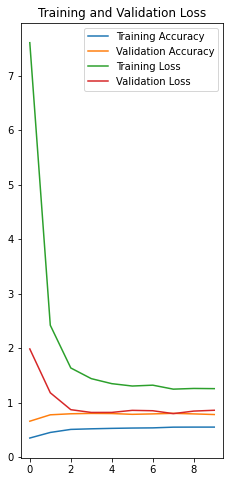

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

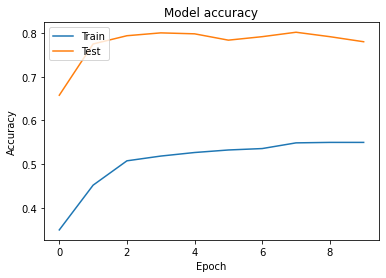

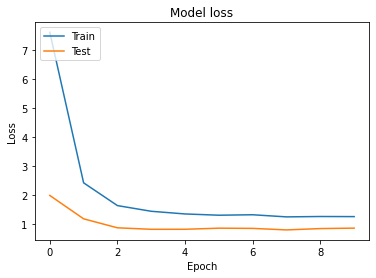

In [21]:
# accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("\n\n");

# loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

To resolve the issues, we will add 6 conv2D layers

To Handle underfitting in CNN
 - add more layers 
 - add more neurons in each layer
 - change the layer used previously 

In [32]:
model = models.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu,kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.22), 

    keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(256, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.4),  

    keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.5), 

    keras.layers.Conv2D(1024, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.5), 

    keras.layers.Flatten(), 
    keras.layers.Dense(8, activation=keras.activations.softmax)
    ])

model.compile(
              optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
173/173 [==============================] - 22s 90ms/step - loss: 3.2005 - accuracy: 0.4761 - val_loss: 3.8993 - val_accuracy: 0.4670
Epoch 2/50
173/173 [==============================] - 15s 86ms/step - loss: 2.1972 - accuracy: 0.6621 - val_loss: 1.7212 - val_accuracy: 0.7527
Epoch 3/50
173/173 [==============================] - 14s 78ms/step - loss: 1.6655 - accuracy: 0.7639 - val_loss: 1.4340 - val_accuracy: 0.7861
Epoch 4/50
173/173 [==============================] - 14s 80ms/step - loss: 1.3558 - accuracy: 0.8145 - val_loss: 1.2875 - val_accuracy: 0.8173
Epoch 5/50
173/173 [==============================] - 14s 80ms/step - loss: 1.1944 - accuracy: 0.8373 - val_loss: 1.1416 - val_accuracy: 0.8209
Epoch 6/50
173/173 [==============================] - 14s 80ms/step - loss: 1.0692 - accuracy: 0.8438 - val_loss: 0.9291 - val_accuracy: 0.8673
Epoch 7/50
173/173 [==============================] - 14s 78ms/step - loss: 0.9664 - accuracy: 0.8578 - val_loss: 0.9832 - val_accuracy:

In [34]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print("Testing Accuracy : " , test_acc)

44/44 - 2s - loss: 0.5953 - accuracy: 0.9311 - 2s/epoch - 36ms/step
Testing Accuracy :  0.9311094880104065


Lets see the graph for our final model test and training accuracy, loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


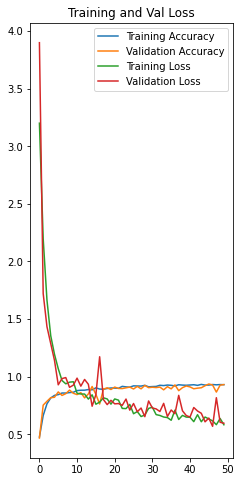

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Val Accuracy')

plt.subplot(1, 2, 1)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Val Loss')
plt.show()

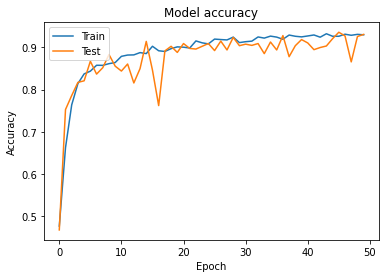

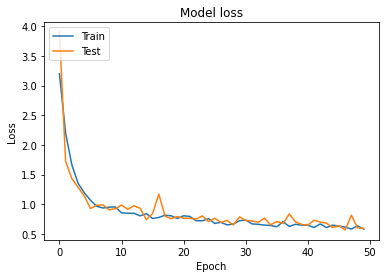

In [37]:
#accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()